# Customer Trasaction Prediction


## Importing the Dataset into the Notebook for Analysis

We need to import the data from the following link:

However, there are some important considerations to keep in mind:

- You need to first upload your Kaggle credentials (a JSON file).
- You must also accept the competition’s terms and conditions before downloading the data.


In [1]:
import os
import zipfile
import pandas as pd

# Crear carpetas necesarias
os.makedirs('./kaggle', exist_ok=True)
os.makedirs('./data', exist_ok=True)

# Establecer variable de entorno para Kaggle
os.environ['KAGGLE_CONFIG_DIR'] = './kaggle'

# Descargar el dataset desde Kaggle Competitions
os.system("kaggle competitions download -c santander-customer-transaction-prediction -p ./data")

# Descomprimir el archivo ZIP descargado
with zipfile.ZipFile("./data/santander-customer-transaction-prediction.zip", "r") as zip_ref:
    zip_ref.extractall("./data")

# Cargar los archivos CSV directamente
df_train = pd.read_csv("./data/train.csv")
df_test = pd.read_csv("./data/test.csv")
df_sample = pd.read_csv("./data/sample_submission.csv")

# Mostrar las formas de los DataFrames
print("Train shape:", df_train.shape)
print("Test shape:", df_test.shape)
print("Sampple shape:", df_sample.shape)


Train shape: (200000, 202)
Test shape: (200000, 201)
Sampple shape: (200000, 2)


In [2]:
import pandas as pd
# Cargar los archivos CSV directamente
df_train = pd.read_csv("./data/train.csv")
df_test = pd.read_csv("./data/test.csv")
df_sample = pd.read_csv("./data/sample_submission.csv")

In [3]:
df_train

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001


In [4]:
df_test

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,test_199995,13.1678,1.0136,10.4333,6.7997,8.5974,-4.1641,4.8579,14.7625,-2.7239,...,2.0544,9.6849,4.6734,-1.3660,12.8721,1.2013,-4.6195,9.1568,18.2102,4.8801
199996,test_199996,9.7171,-9.1462,7.3443,9.1421,12.8936,3.0191,5.6888,18.8862,5.0915,...,5.0071,6.6548,1.8197,2.4104,18.9037,-0.9337,2.9995,9.1112,18.1740,-20.7689
199997,test_199997,11.6360,2.2769,11.2074,7.7649,12.6796,11.3224,5.3883,18.3794,1.6603,...,5.1536,2.6498,2.4937,-0.0637,20.0609,-1.1742,-4.1524,9.1933,11.7905,-22.2762
199998,test_199998,13.5745,-0.5134,13.6584,7.4855,11.2241,-11.3037,4.1959,16.8280,5.3208,...,3.4259,8.5012,2.2713,5.7621,17.0056,1.1763,-2.3761,8.1079,8.7735,-0.2122


In [5]:
df_sample

,ID_code,target
0,test_0,0
1,test_1,0
2,test_2,0
3,test_3,0
4,test_4,0
...,...,...
199995,test_199995,0
199996,test_199996,0
199997,test_199997,0
199998,test_199998,0


## Data Preprocessing


In [6]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 🧾 1. Separate features and target
# 'ID_code' is just an identifier, and 'target' is the label we want to predict
X_train = df_train.drop(columns=['ID_code', 'target'])
y_train = df_train['target']

# For test set, we drop only 'ID_code' (it has no labels)
X_test = df_test.drop(columns=['ID_code'])

# ✅ 2. Initialize the scaler
# MinMaxScaler scales each feature to the [0, 1] range
scaler = MinMaxScaler()

# ⚠️ 3. Fit the scaler ONLY on the training data to avoid data leakage
scaler.fit(X_train)

# 🔄 4. Transform both training and test data using the fitted scaler
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)



In [7]:
# ✅ Now X_train_scaled and X_test_scaled are normalized and ready for modeling
print("✅ Normalization complete. Scaled training data:")
X_train_scaled.head()

✅ Normalization complete. Scaled training data:


,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0.427853,0.324824,0.568059,0.388041,0.550670,0.467321,0.454298,0.594255,0.270395,0.247420,...,0.569515,0.342943,0.568958,0.448173,0.510975,0.300318,0.678981,0.430958,0.327658,0.560645
1,0.557212,0.428639,0.681235,0.410417,0.628408,0.795072,0.536604,0.500584,0.660911,0.573056,...,0.668079,0.536531,0.523717,0.756190,0.350211,0.765154,0.686614,0.468277,0.609546,0.605827
2,0.411969,0.483777,0.578061,0.599690,0.474941,0.471329,0.753295,0.414724,0.270429,0.276041,...,0.522496,0.643141,0.448960,0.448000,0.671183,0.881350,0.236337,0.381950,0.425833,0.582736
3,0.535099,0.507140,0.396562,0.546993,0.647586,0.616822,0.572995,0.428577,0.224846,0.595326,...,0.570474,0.383085,0.370986,0.439205,0.745555,0.418549,0.346810,0.717176,0.590016,0.443232
4,0.473637,0.533434,0.624133,0.504796,0.621079,0.702836,0.589011,0.622220,0.811883,0.516413,...,0.387371,0.629275,0.299888,0.697737,0.238801,0.393218,0.557507,0.586526,0.591416,0.446041


In [8]:
y_train

0         0
1         0
2         0
3         0
4         0
         ..
199995    0
199996    0
199997    0
199998    0
199999    0
Name: target, Length: 200000, dtype: int64

In [9]:
X_test_scaled

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0.535360,0.897837,0.628717,0.715833,0.548256,0.605894,0.574061,0.578182,0.611866,0.674016,...,0.366928,0.749230,0.195180,0.473444,0.260824,0.810571,0.570992,0.788006,0.463751,0.447387
1,0.408005,0.641132,0.533050,0.395056,0.355501,0.573148,0.601977,0.594479,0.294934,0.279021,...,0.759502,0.593904,0.389199,0.728803,0.357802,0.601884,0.391146,0.647505,0.648642,0.265418
2,0.254905,0.184314,0.465517,0.535820,0.447373,0.850517,0.417628,0.667081,0.582317,0.609142,...,0.410181,0.705125,0.474327,0.464437,0.222877,0.775034,0.218283,0.182324,0.687383,0.232704
3,0.408357,0.539775,0.574667,0.500064,0.325182,0.717406,0.424956,0.681060,0.671982,0.485690,...,0.727342,0.606357,0.447945,0.511046,0.337572,0.883857,0.558429,0.541227,0.339614,0.514331
4,0.567520,0.586569,0.696941,0.588941,0.347404,0.481345,0.739656,0.235211,0.653272,0.441944,...,0.563075,0.611288,0.417291,0.504277,0.564603,0.521822,0.278146,0.219809,0.385580,0.440485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0.640963,0.631663,0.482493,0.517058,0.303761,0.570088,0.411547,0.421303,0.376709,0.421053,...,0.496330,0.637700,0.694767,0.346494,0.217199,0.677823,0.294798,0.529190,0.602175,0.649304
199996,0.467619,0.231989,0.303274,0.694130,0.674232,0.714288,0.547751,0.605874,0.755054,0.332029,...,0.587087,0.481575,0.461181,0.472101,0.530783,0.453886,0.529005,0.521640,0.600345,0.268492
199997,0.564014,0.681360,0.527405,0.590022,0.655778,0.880974,0.498492,0.583190,0.588949,0.245623,...,0.591590,0.275219,0.516350,0.389809,0.590946,0.428660,0.309156,0.535233,0.277617,0.246113
199998,0.661394,0.571593,0.669608,0.568900,0.530267,0.426764,0.303029,0.513752,0.766154,0.686996,...,0.538486,0.576710,0.498146,0.583582,0.432101,0.675201,0.363760,0.355525,0.125087,0.573698


## Data Visualization


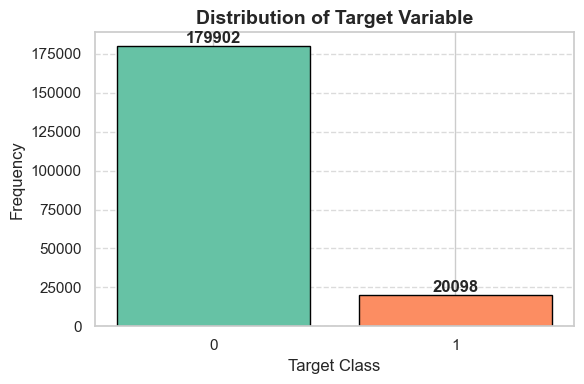

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for better aesthetics
sns.set(style="whitegrid")

# Count occurrences of each class (0 and 1)
value_counts = df_train['target'].value_counts().sort_index()

# Create the plot
plt.figure(figsize=(6, 4))
bars = plt.bar(value_counts.index.astype(str), value_counts.values, color=sns.color_palette("Set2"), edgecolor='black')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 1, f'{int(height)}', 
             ha='center', va='bottom', fontweight='bold')

# Set titles and labels
plt.title('Distribution of Target Variable', fontsize=14, fontweight='bold')
plt.xlabel('Target Class', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks([0, 1], labels=['0', '1'])

# Add horizontal gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Make layout tight and show plot
plt.tight_layout()
plt.show()


The data is imbalanced with respect to the target variable. This is an important factor to consider when building the model, as it may affect its performance and bias the predictions.

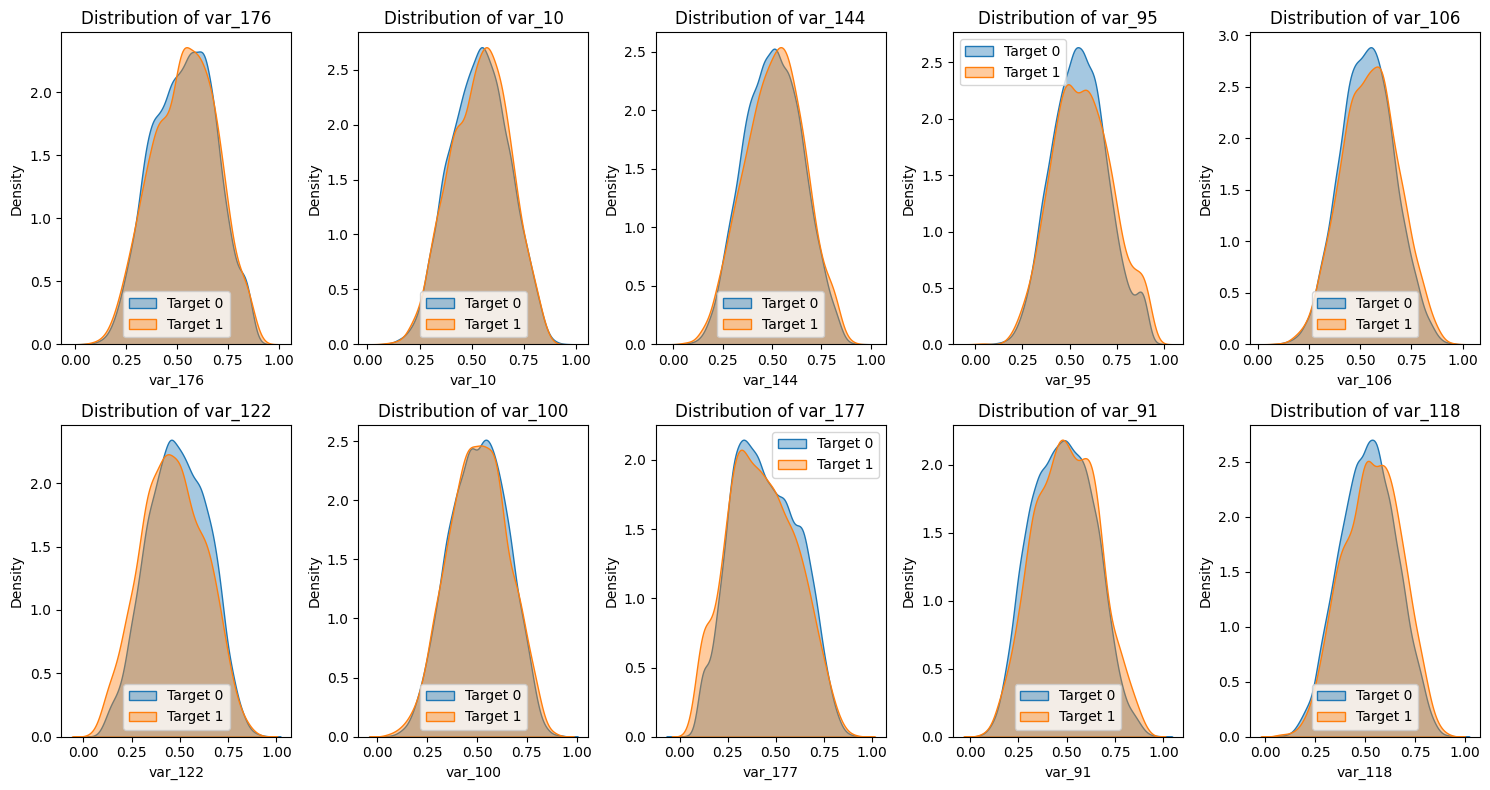

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import random

frac = 0.10

# Step 1: Randomly sample 10 columns from X_train_scaled
sample_vars = random.sample(list(X_train_scaled.columns), 10)

# Step 2: Set up the plotting grid: 2 rows and 5 columns (10 plots)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 8))  # Create a grid of subplots
axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easy iteration

# Step 3: Loop through the selected columns and plot their KDEs
for i, var in enumerate(sample_vars):
    # Create the KDE plot for target=0
    sns.kdeplot(X_train_scaled.sample(frac=frac)[var][y_train == 0], label='Target 0', fill=True, alpha=0.4, ax=axes[i])
    
    # Create the KDE plot for target=1
    sns.kdeplot(X_train_scaled.sample(frac=frac)[var][y_train == 1], label='Target 1', fill=True, alpha=0.4, ax=axes[i])
    
    # Set the title and legend for each subplot
    axes[i].set_title(f'Distribution of {var}')
    axes[i].legend()

# Step 4: Adjust the layout to ensure no overlapping elements
plt.tight_layout()

# Step 5: Display the plots
plt.show()

# Key Takeaways:
# 1. **KDE plots** are used to visualize the distribution of data and compare it across different classes.
#    - The X-axis represents the feature values, and the Y-axis represents the probability density.
#    - Each class (e.g., Target 0 and Target 1) will have its own KDE curve.
# 
# 2. **Features with separated KDE curves** are good for classification because they help distinguish between the classes.
#    - When the KDE curves for both classes (Target 0 and Target 1) are well-separated, it indicates that the feature is effective in distinguishing between the classes.
#    - This suggests that this feature can be a **strong predictor** for the target variable in a classification model.
#
# 3. **Overlapping curves suggest the feature doesn’t offer significant predictive power for the target.**
#    - If the curves for the two classes significantly overlap, it implies that the feature doesn't provide much information for separating the two classes.
#    - This means the feature may not be **useful** for classification tasks, as it doesn't help differentiate between the target classes.


**Key Takeaways:**

1. **Boxplots** se utilizan para visualizar la distribución de una característica entre diferentes clases (por ejemplo, Target 0 y Target 1).
    - El eje Y muestra los valores de la característica y el eje X representa la clase objetivo (por ejemplo, Target 0 o Target 1).
    - La caja representa el rango intercuartílico (IQR) de los valores, mientras que los "bigotes" muestran el rango de los datos.
    - Los valores atípicos se representan como puntos fuera de los bigotes.

2. **Los boxplots ayudan a evaluar la separabilidad de las características**:
    - Una distribución bien separada entre clases (Target 0 y Target 1) sugiere que la característica podría ser útil para la clasificación.
    - Si los boxplots de las diferentes clases son distintos (es decir, las líneas de la mediana y los rangos intercuartílicos no se superponen), esto significa que la característica puede ayudar a distinguir entre las clases.
    - Por ejemplo, si Target 0 tiene valores mayormente bajos y Target 1 valores altos (con poca superposición), la característica puede ser un predictor efectivo.

3. **Los boxplots también identifican valores atípicos**:
    - La presencia de outliers en el boxplot puede indicar valores significativamente diferentes al resto de los datos. Estos outliers pueden afectar el rendimiento del modelo.
    - Una característica con muchos outliers podría requerir pasos adicionales de preprocesamiento como imputación, transformación o manejo específico de valores atípicos.

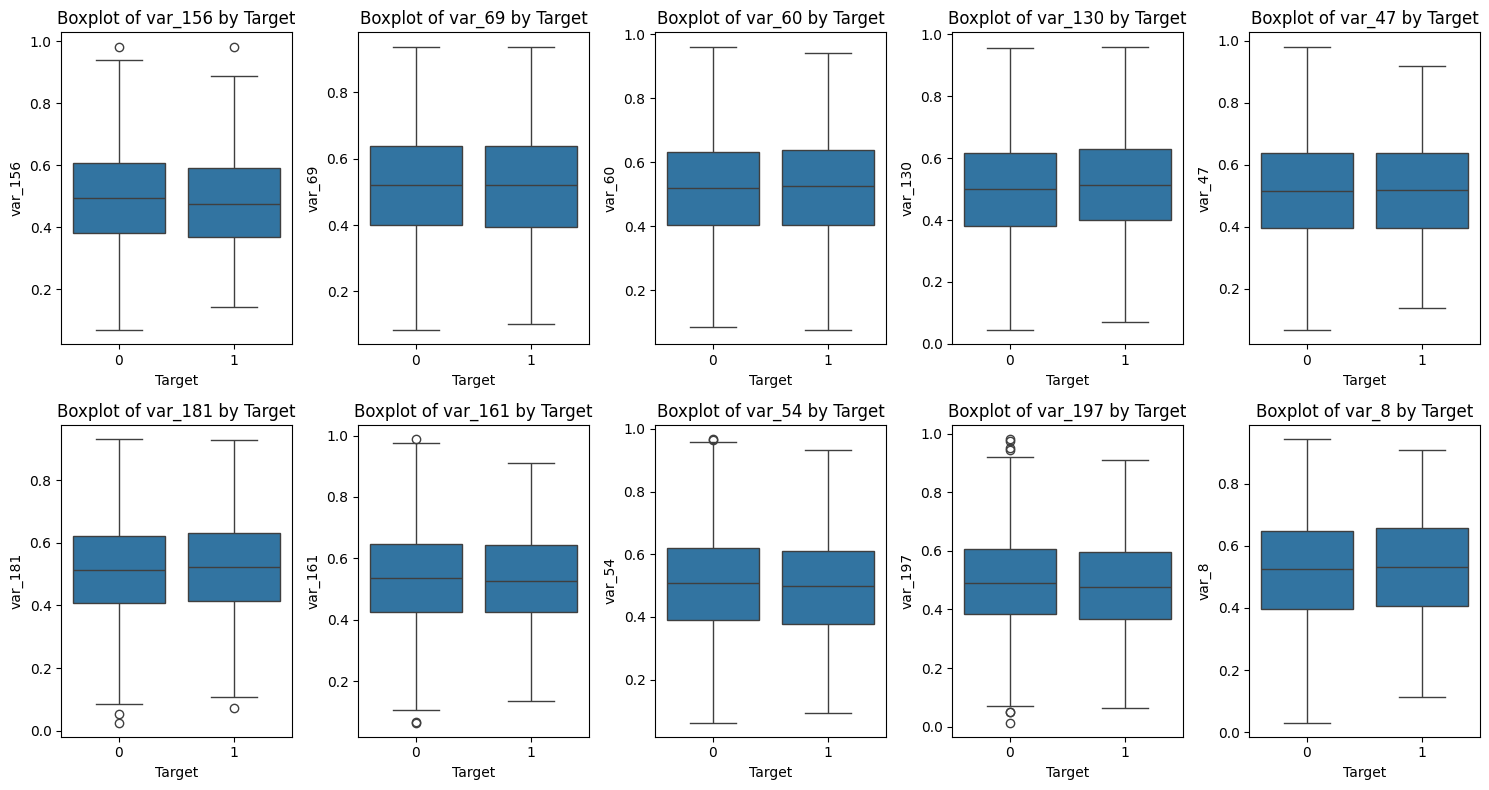

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Step 1: Randomly select 10 variables from X_train_scaled
sample_vars = random.sample(list(X_train_scaled.columns), 10)

# Step 2: Set up the plotting grid: 2 rows and 5 columns (10 plots in total)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 8))  # Create a grid of subplots
axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easy iteration

# Select a frac of index to sample for visualization
frac = 0.10  # Fraction of data to sample for visualization
indices = X_train_scaled.sample(frac=frac).index  # Sample indices for visualization

x_filtered = X_train_scaled.loc[indices]  # Filter the scaled training data using the sampled indices
y_filtered = y_train.loc[indices]  # Filter the target variable using the same sampled indices

# Step 3: Loop through the selected variables and plot their boxplots
for i, var in enumerate(sample_vars):
    sns.boxplot(x=y_filtered, y=x_filtered[var], ax=axes[i])  # Create boxplot for the selected variable by target class
    axes[i].set_title(f'Boxplot of {var} by Target')  # Set the title for each subplot
    axes[i].set_xlabel('Target')  # Label the X-axis (Target class)
    axes[i].set_ylabel(var)  # Label the Y-axis with the variable name

# Step 4: Adjust the layout to ensure no overlapping elements
plt.tight_layout()

# Step 5: Display the plots
plt.show()

**Key Takeaways:**
1. **Correlation Heatmaps** muestran las relaciones entre todas las características del conjunto de datos, incluyendo cuán fuertemente se correlacionan entre sí.
    - Los valores van de -1 a 1, donde:
      - Un valor de 1 indica **correlación positiva perfecta** (a medida que una característica aumenta, la otra también lo hace en la misma proporción).
      - Un valor de -1 indica **correlación negativa perfecta** (a medida que una característica aumenta, la otra disminuye en la misma proporción).
      - Un valor de 0 indica **ausencia de correlación lineal**.

2. **¿Por qué es útil el mapa de calor de correlación para el modelo?**
    - **Multicolinealidad**: Las características que están fuertemente correlacionadas entre sí (valores cercanos a 1 o -1) pueden causar multicolinealidad. Esto puede afectar negativamente a ciertos modelos (por ejemplo, regresión lineal), ya que las características redundantes pueden inflar los errores estándar.
    - **Selección de características**: Las características altamente correlacionadas pueden ser redundantes, es decir, aportan información similar. Eliminar una de estas características puede simplificar el modelo sin perder poder predictivo.
    - **Poder predictivo**: Las características con **alta correlación** (positiva o negativa) con la variable objetivo suelen ser buenos predictores. Es recomendable priorizar estas características al construir el modelo.


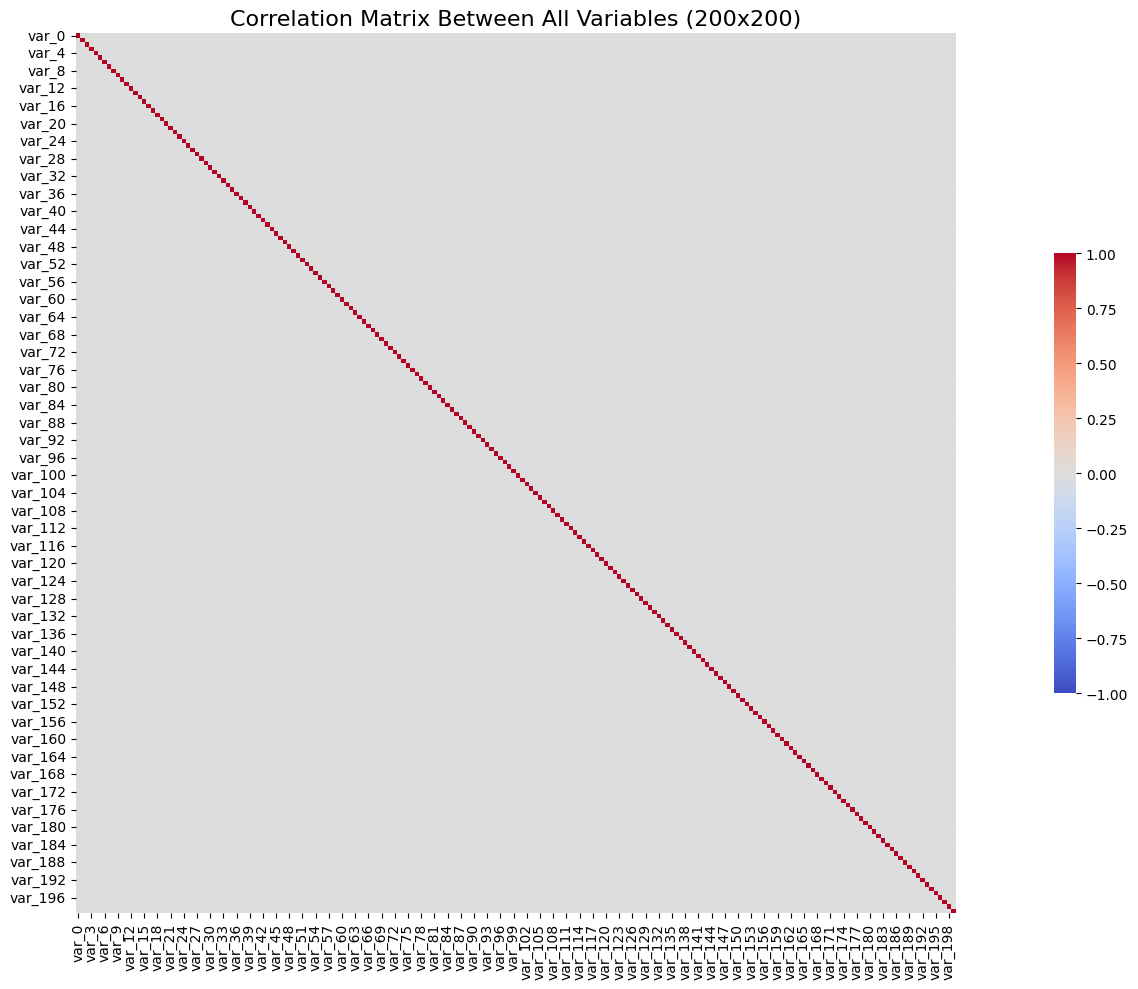

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Calculate the correlation matrix
# corr_matrix = X_train.sample(frac=0.1).corr()
corr_matrix = X_train_scaled.sample(frac=0.1).corr()

# Step 2: Set up the figure with a large size
plt.figure(figsize=(20, 10))  # Wider and taller figure

# Step 3: Create the heatmap without annotations (to reduce clutter)
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    center=0,
    vmax=1.0,
    vmin=-1.0,
    square=True,        # Keep cells square for visual consistency
    cbar_kws={"shrink": 0.5},  # Make colorbar smaller
    linewidths=0         # No lines between cells
)

# Step 4: Add title
plt.title('Correlation Matrix Between All Variables (200x200)', fontsize=16)

# Step 5: Display the plot
plt.tight_layout()
plt.show()

## PCA Application
- Motivation: The goal of applying PCA is to reduce the dimensionality of the dataset while preserving as much variance as possible. This helps simplify the model, speed up computations, and potentially remove noise or redundant features from the data.

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

def apply_pca(X, n_components=None, variance_threshold=None, verbose=True, plot=True):
    """
    Applies PCA to the input data, scaled beforehand.

    Parameters:
    -----------
    X : array-like or DataFrame
        Feature matrix to be reduced.
        
    n_components : int or None
        Exact number of components to keep (optional).
        
    variance_threshold : float or None
        Percentage of variance to retain (e.g., 0.95). Overrides n_components.
        
    verbose : bool
        If True, prints number of components and total variance retained.

    plot : bool
        If True, shows variance-related PCA plots.
    
    Returns:
    --------
    X_pca : np.ndarray
        Transformed data in reduced space.
        
    pca : PCA object
        Fitted PCA model.
        
    scaler : StandardScaler
        Fitted scaler to apply to other datasets.
    """
    if variance_threshold is not None and not (0 < variance_threshold <= 1):
        raise ValueError("variance_threshold must be a float between 0 and 1.")
    
    if n_components is not None and not isinstance(n_components, int):
        raise ValueError("n_components must be an integer.")

    

    # Step 2: PCA configuration
    if variance_threshold is not None:
        pca = PCA(n_components=variance_threshold)
    elif n_components is not None:
        pca = PCA(n_components=n_components)
    else:
        raise ValueError("You must provide either `variance_threshold` or `n_components`.")

    # Step 3: Apply PCA
    X_pca = pca.fit_transform(X)

    if verbose:
        print(f"➡ PCA components selected: {pca.n_components_}")
        print(f"✅ Total variance retained: {np.sum(pca.explained_variance_ratio_):.4f}")

    # Step 4: Plot variance curves
    if plot:
        # Cumulative variance explained
        plt.figure(figsize=(8, 5))
        plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='blue')
        plt.axhline(y=0.95, color='red', linestyle='--', label='95% Threshold')
        plt.axvline(x=X_pca.shape[1], color='green', linestyle='--', label=f'{X_pca.shape[1]} Components')
        plt.xlabel('Number of PCA Components')
        plt.ylabel('Cumulative Explained Variance')
        plt.title('PCA - Cumulative Explained Variance')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # Scree plot
        plt.figure(figsize=(10, 5))
        plt.bar(range(1, len(pca.explained_variance_ratio_)+1),
                pca.explained_variance_ratio_, alpha=0.6, color='purple')
        plt.xlabel('PCA Component Index')
        plt.ylabel('Explained Variance Ratio')
        plt.title('PCA - Explained Variance Per Component')
        plt.tight_layout()
        plt.show()

    return X_pca, pca, scaler


➡ PCA components selected: 173
✅ Total variance retained: 0.9017


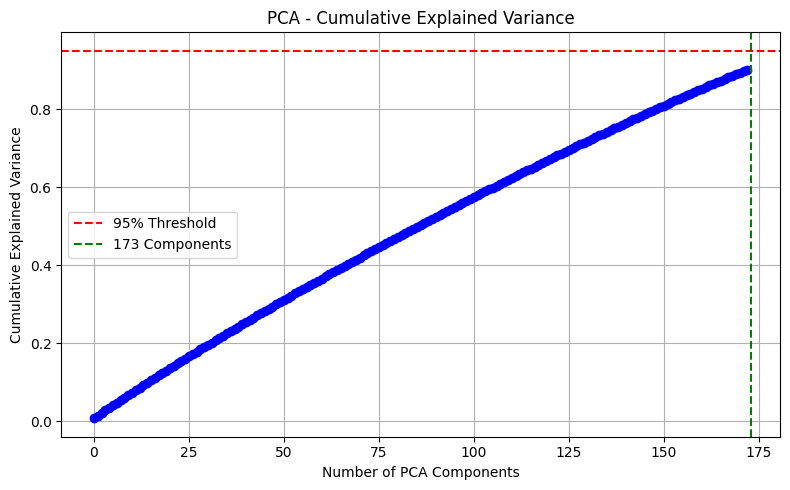

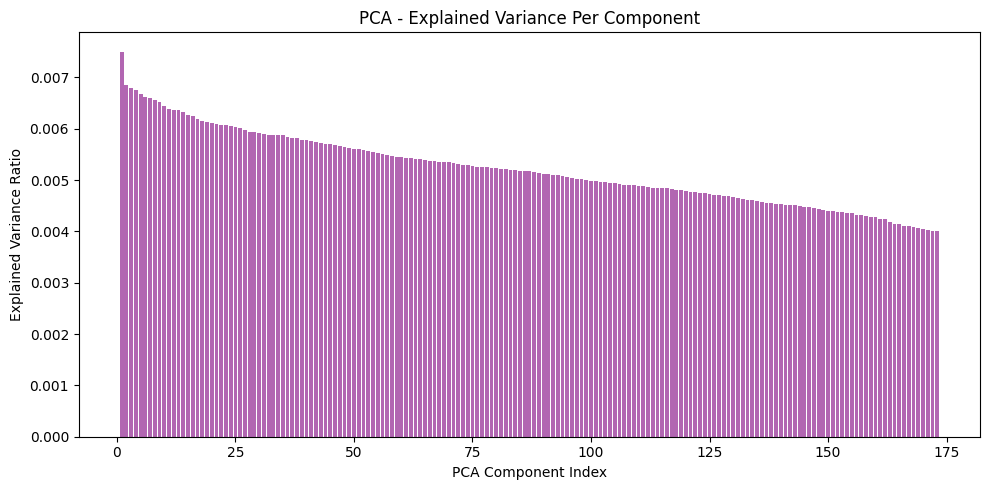

In [11]:
X_pca, pca_model, scaler = apply_pca(X=X_train_scaled, variance_threshold=0.90)


In [12]:
X_pca

array([[ 0.1403027 ,  0.09623985, -0.32638501, ..., -0.01836594,
        -0.09712475,  0.1784709 ],
       [ 0.31722044, -0.09139859, -0.2778439 , ...,  0.10958341,
         0.10532579, -0.05008514],
       [ 0.20004016,  0.02690652, -0.18444627, ..., -0.08316823,
         0.21217489,  0.12041262],
       ...,
       [-0.0768995 , -0.14804553, -0.2864867 , ..., -0.22594623,
        -0.09345639, -0.01460729],
       [ 0.09197575,  0.28763803,  0.39378563, ..., -0.1937438 ,
        -0.09798474,  0.23079452],
       [ 0.15033582, -0.01319176,  0.0919835 , ..., -0.14271361,
         0.06283614, -0.12428913]])

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score,recall_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import precision_score, average_precision_score



# === Model Training Functions ===
def train_logistic(X_train, y_train):
    """
    Trains a Logistic Regression classifier with L2 regularization,
    optimized for large datasets.
    """
    model = LogisticRegression(
        penalty='l2',
        C=1.0,
        solver='saga',             # Better for large datasets and supports 'l1' and 'l2'
        max_iter=1000,             # Increased for better convergence
        class_weight='balanced',  # Handle class imbalance
        n_jobs=-1,                 # Use all available CPU cores
        random_state=42            # Reproducibility
    )
    model.fit(X_train, y_train)
    return model


def train_rf(X_train, y_train):
    """
    Trains a Random Forest classifier with robust, standard parameters.
    """
    model = RandomForestClassifier(
        n_estimators=200,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42,
        n_jobs=-1,
        class_weight='balanced'
    )
    model.fit(X_train, y_train)
    return model


def train_knn(X_train, y_train):
    """
    Trains a K-Nearest Neighbors classifier using Euclidean distance.
    """
    model = KNeighborsClassifier(
        n_neighbors=5,
        weights='distance',
        metric='minkowski',
        p=2  # Euclidean distance
    )
    model.fit(X_train, y_train)
    return model


def train_svc(X_train, y_train):
    """
    Trains a Support Vector Machine classifier with RBF kernel.
    """
    model = SVC(
        kernel='rbf',
        C=1.0,
        gamma='scale',
        probability=True,
        class_weight='balanced'
    )
    model.fit(X_train, y_train)
    return model


def train_gb(X_train, y_train):
    """
    Trains a Gradient Boosting classifier with robust default parameters.
    """
    model = GradientBoostingClassifier(
        n_estimators=150,
        learning_rate=0.1,
        max_depth=5,
        subsample=0.8,
        random_state=42
    )
    model.fit(X_train, y_train)
    return model



def train_xgboost(X_train, y_train, use_gpu=False):
    """
    Trains an XGBoost classifier optimized for large datasets.
    Uses GPU if available or CPU otherwise.
    """
    # Define the model with optimized parameters for large datasets
    model_params = {
        'objective': 'binary:logistic',      # Binary classification
        'eval_metric': 'logloss',            # Logarithmic loss as evaluation metric
        'learning_rate': 0.05,               # Lower learning rate for large datasets
        'max_depth': 6,                      # Depth of each tree to prevent overfitting
        'n_estimators': 1000,                # Number of boosting rounds (trees)
        'subsample': 0.8,                    # Use 80% of data for each tree to prevent overfitting
        'colsample_bytree': 0.8,             # Use 80% of features for each tree
        'scale_pos_weight': 1,               # Adjust for class imbalance (1 for balanced dataset)
        'n_jobs': -1,                        # Use all available CPU cores
        'random_state': 42                   # Reproducibility
    }
    
    if use_gpu:
        model_params['tree_method'] = 'gpu_hist'  # Use GPU if available
    else:
        model_params['tree_method'] = 'hist'     # Use histogram method for faster CPU training
    
    # Initialize and train the model
    model = xgb.XGBClassifier(**model_params)
    
    # Train the model on the training data
    model.fit(X_train, y_train)
    
    return model


# === Model Evaluation Function ===

def evaluate_models(X, y, show_plot=True):
    """
    Trains and evaluates multiple classification models using Accuracy, F1 Score, and ROC AUC.

    Parameters:
    -----------
    X : array-like or pd.DataFrame
        Feature matrix (already normalized).
    
    y : array-like
        Target labels.
    
    show_plot : bool, default=True
        If True, displays a bar plot comparing model performance.

    Returns:
    --------
    df_results : pd.DataFrame
        DataFrame containing evaluation metrics for each model.
    """
    # Train-test split (data assumed already normalized)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Define models
    models = {
        'Logistic Regression': train_logistic(X_train, y_train),
        'Random Forest': train_rf(X_train, y_train),
        'K-Nearest Neighbors': train_knn(X_train, y_train),
        'SVM (RBF Kernel)': train_svc(X_train, y_train),
        'Gradient Boosting': train_gb(X_train, y_train),
        'XGBoost': train_xgboost(X_train, y_train, use_gpu=False)  # O True si tienes GPU
    }

    # Evaluate models
    results = []
    for name, model in models.items():
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

        metrics = {
            'Model': name,
            'Accuracy': accuracy_score(y_test, y_pred),
            'F1 Score': f1_score(y_test, y_pred),
            'Recall': recall_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred),
            'ROC AUC': roc_auc_score(y_test, y_proba) if y_proba is not None else None,
            'PR AUC': average_precision_score(y_test, y_proba) if y_proba is not None else None
        }

        results.append(metrics)

    df_results = pd.DataFrame(results).sort_values(by='F1 Score', ascending=False)

    # Visualization
    if show_plot:
        plt.figure(figsize=(10, 5))
        df_plot = df_results.melt(id_vars='Model', value_vars=[ 'Accuracy', 'F1 Score', 'Recall', 'Precision', 'ROC AUC', 'PR AUC'])
        sns.barplot(data=df_plot, x='Model', y='value', hue='variable')
        plt.title("Classification Model Performance Comparison")
        plt.ylabel("Score")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    return df_results

### Evaluate using all dataset

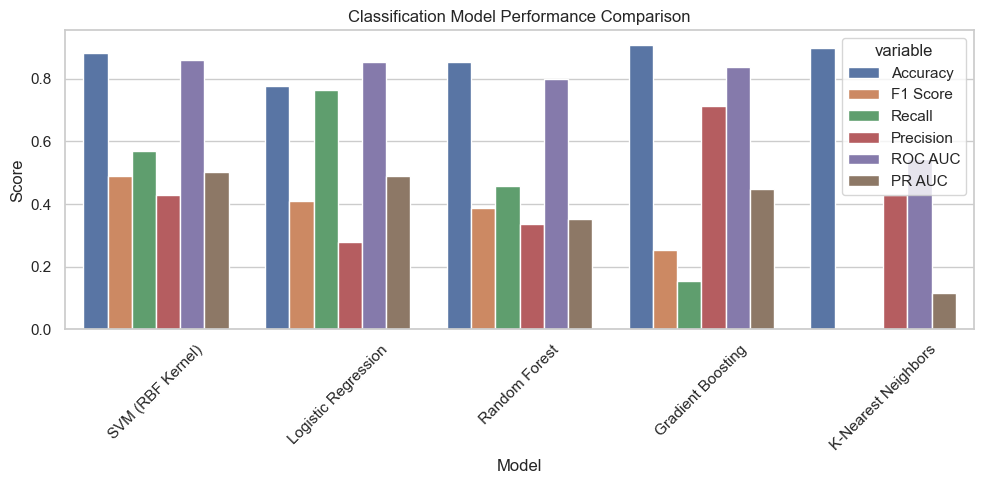

,Model,Accuracy,F1 Score,Recall,Precision,ROC AUC,PR AUC
3,SVM (RBF Kernel),0.880600,0.490034,0.570907,0.429231,0.860032,0.502389
0,Logistic Regression,0.778200,0.409426,0.765135,0.279491,0.854505,0.490033
1,Random Forest,0.854567,0.387907,0.458617,0.336088,0.797674,0.351946
4,Gradient Boosting,0.908717,0.252695,0.153591,0.712308,0.838112,0.448366
2,K-Nearest Neighbors,0.899467,0.002975,0.001493,0.428571,0.544808,0.117153


In [ ]:
# Evaluate the models using the PCA-transformed data
df_1_imbalanced_no_nn = evaluate_models(X_pca, y_train, show_plot=True)

### Evaluate using frac=0.1 of dataset

In [8]:
# Convertir X_pca a DataFrame y asignar los mismos índices que y_train
X_pca_df = pd.DataFrame(X_pca, index=y_train.index)

In [ ]:
import pandas as pd

frac = 0.001  # Fraction of data to sample for visualization

indices = X_pca_df.sample(frac=frac).index  # Sample indices for visualization
X_pca_filtered = X_pca_df.loc[indices]  # Filter the PCA-transformed data using the sampled indices
y_train_filtered = y_train.loc[indices]  # Filter the target variable using the same sampled indices

evaluate_models(X_pca_filtered, y_train_filtered, show_plot=True)

**Note**: Model evaluation pause due long training time. You can run the code in a local environment with sufficient resources to complete the evaluation.

## under-Sampling the Data
In this section, we address the issue of class imbalance by applying under-sampling to the majority class.

- ⚠️ Why Under-Sampling?
The original dataset is imbalanced, which can lead to a biased model that favors the majority class. Under-sampling helps mitigate this issue by reducing the number of samples in the majority class, resulting in a more balanced class distribution.

- ✅ Advantages of Under-Sampling
Faster training time due to fewer samples.

Helps the model learn better representations for the minority class.

Simplifies the training data and reduces redundancy.



In [9]:
df_train.head()


,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


### Evaluate the models manual undersampling

In [13]:
# ===============================
# Undersampling to Balance Classes
# ===============================

import pandas as pd
from sklearn.utils import resample
from collections import Counter

# Step 1: Separate majority and minority classes
# -----------------------------------------------
# Separate the dataframe into two groups based on the target variable.
df_majority = df_train[df_train["target"] == 0]
df_minority = df_train[df_train["target"] == 1]

# Step 2: Downsample the majority class
# -----------------------------------------------
# Randomly sample the majority class to match the number of samples in the minority class.
df_majority_downsampled = resample(
    df_majority,
    replace=False,  # do not sample with replacement
    n_samples=len(df_minority),  # match minority class size
    random_state=42  # for reproducibility
)

# Step 3: Combine downsampled majority class with minority class
# -----------------------------------------------
# Concatenate both datasets to create a balanced dataframe.
df_balanced = pd.concat([df_majority_downsampled, df_minority])

# Step 4: Shuffle the dataset
# -----------------------------------------------
# Shuffle the resulting dataset to avoid any ordering bias.
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 5: Verify the class distribution
# -----------------------------------------------
print("Balanced class distribution:", Counter(df_balanced["target"]))
df_balanced.head()


Balanced class distribution: Counter({0: 20098, 1: 20098})


,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_93663,0,10.3928,1.7918,6.5499,5.3402,12.4768,-4.4667,4.8115,15.2205,...,2.1946,9.1254,2.6524,0.1222,22.6535,-1.5869,4.8056,8.8921,8.9629,-0.8214
1,train_79999,1,7.4916,-1.2003,12.0828,5.3543,8.1757,1.4249,6.7189,12.3687,...,3.8231,10.6358,-0.2428,5.1078,14.9809,1.3753,-4.6900,7.9203,11.1104,-17.2856
2,train_183269,1,5.4996,-2.8858,9.2684,8.3963,10.9579,2.1132,4.8987,14.1187,...,-0.9533,12.2975,1.5756,8.2362,18.7584,-0.4198,2.1553,7.7340,11.4561,-19.5957
3,train_152347,0,7.5007,-9.9060,7.8411,6.1763,11.5932,-11.0909,4.4462,15.1827,...,0.9511,3.5496,5.3360,6.3093,15.1478,1.1598,-2.4807,8.9865,19.7654,-14.2710
4,train_130999,1,16.5429,1.5395,10.2746,9.1610,12.6165,7.1833,5.6620,9.8865,...,-1.1256,4.6033,3.6112,0.0633,21.8555,0.5176,-0.8509,7.5118,15.6947,-1.9234


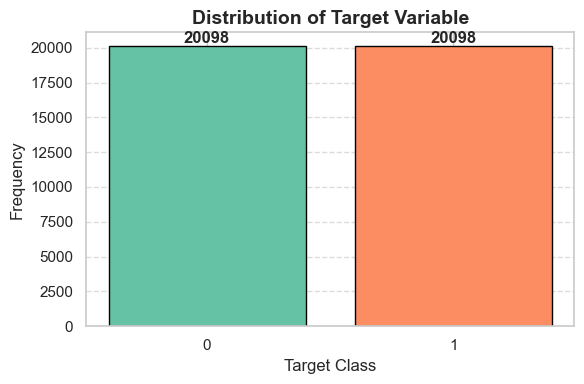

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for better aesthetics
sns.set(style="whitegrid")

# Count occurrences of each class (0 and 1)
value_counts = df_balanced['target'].value_counts().sort_index()

# Create the plot
plt.figure(figsize=(6, 4))
bars = plt.bar(value_counts.index.astype(str), value_counts.values, color=sns.color_palette("Set2"), edgecolor='black')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 1, f'{int(height)}', 
             ha='center', va='bottom', fontweight='bold')

# Set titles and labels
plt.title('Distribution of Target Variable', fontsize=14, fontweight='bold')
plt.xlabel('Target Class', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks([0, 1], labels=['0', '1'])

# Add horizontal gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Make layout tight and show plot
plt.tight_layout()
plt.show()


### Evaluate the models using the library imblearn

Balanced class distribution after imblearn undersampling: Counter({0: 20098, 1: 20098})


C:\Users\ricardo.jaramillo\AppData\Local\Temp\ipykernel_27040\3921530033.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_balanced, palette='Set2')


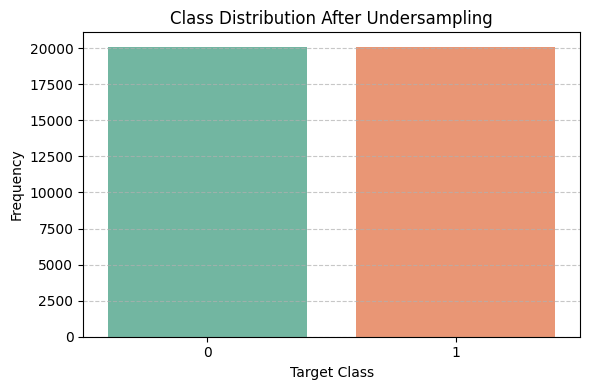

In [ ]:
# Undersampling con librería de imblearn
from imblearn.under_sampling import RandomUnderSampler

# Step 1: Initialize the RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Step 2: Fit and transform the training data
X_balanced, y_balanced = rus.fit_resample(X_train_scaled, y_train)

# Step 3: Convert to DataFrame for easier handling
X_balanced_df = pd.DataFrame(X_balanced, columns=X_train_scaled.columns)

# Step 4: Verify the class distribution
print("Balanced class distribution after imblearn undersampling:", Counter(y_balanced))

# Step 5: Visualize the class distribution
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.countplot(x=y_balanced, palette='Set2')
plt.title('Class Distribution After Undersampling')
plt.xlabel('Target Class')
plt.ylabel('Frequency')
plt.xticks([0, 1], labels=['0', '1'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Evaluate the models using the balanced data
# evaluate_models(X_balanced_df, y_balanced, show_plot=True)


### Apply PCA to the undersampled dataset

➡ PCA components selected: 172
✅ Total variance retained: 0.9009


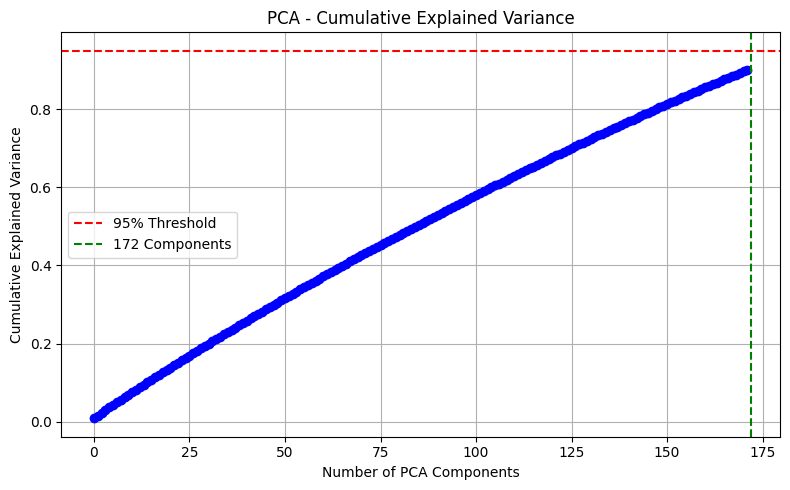

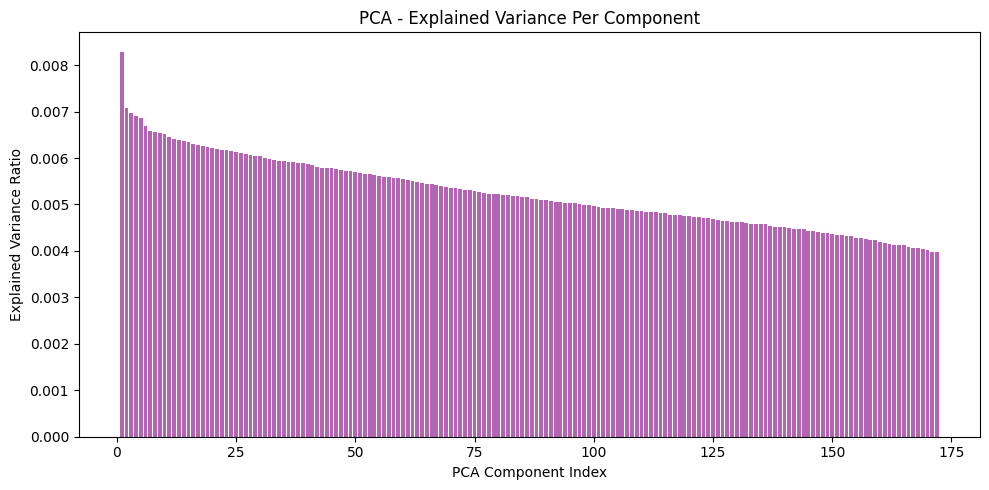

In [14]:

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 🧾 1. Separate features and target
# 'ID_code' is just an identifier, and 'target' is the label we want to predict
X_train = df_balanced.drop(columns=['ID_code', 'target'])
y_train = df_balanced['target']

# For test set, we drop only 'ID_code' (it has no labels)
X_test = df_test.drop(columns=['ID_code'])

# ✅ 2. Initialize the scaler
# MinMaxScaler scales each feature to the [0, 1] range
scaler = MinMaxScaler()

# ⚠️ 3. Fit the scaler ONLY on the training data to avoid data leakage
scaler.fit(X_train)

# 🔄 4. Transform both training and test data using the fitted scaler
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)


X_pca, pca_model, scaler = apply_pca(X=X_train_scaled, variance_threshold=0.90)

In [15]:
X_pca.shape, y_train.shape

((40196, 172), (40196,))

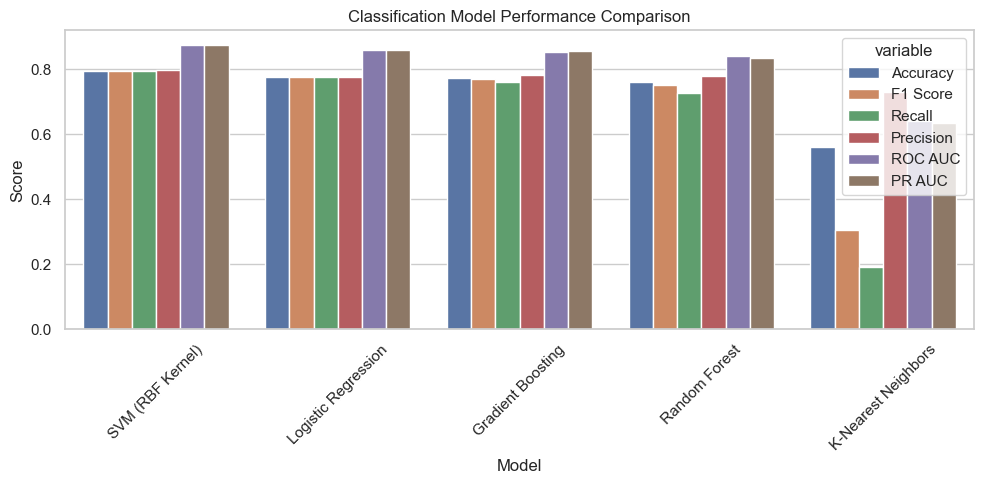

,Model,Accuracy,F1 Score,Recall,Precision,ROC AUC,PR AUC
3,SVM (RBF Kernel),0.795423,0.795185,0.794327,0.796044,0.873999,0.874989
0,Logistic Regression,0.776184,0.776369,0.777077,0.775662,0.857649,0.859856
4,Gradient Boosting,0.773613,0.770781,0.761320,0.780480,0.853395,0.855347
1,Random Forest,0.759350,0.751030,0.725991,0.777857,0.840162,0.832885
2,K-Nearest Neighbors,0.560660,0.305454,0.193233,0.728580,0.641480,0.633014


In [ ]:
df_2_balanced_no_nn = evaluate_models(X_pca, y_train, show_plot=True)

## Apply the Regularization Term Lasso to the PCA Data

In [18]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt

# Supongamos que ya tienes:
# - X_pca: tus datos transformados por PCA (array o DataFrame)
# - y_train: tu variable objetivo
# - opcionalmente, feature_names: nombres originales de tus features o componentes principales

# Si X_pca es un ndarray, conviértelo a DataFrame para facilitar el análisis
if isinstance(X_pca, np.ndarray):
    n_features = X_pca.shape[1]
    feature_names = [f"PC{i+1}" for i in range(n_features)]  # Nombres de componentes principales
    X_pca_df = pd.DataFrame(X_pca, columns=feature_names)
else:
    X_pca_df = X_pca.copy()
    feature_names = X_pca_df.columns

In [19]:
X_pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC163,PC164,PC165,PC166,PC167,PC168,PC169,PC170,PC171,PC172
0,0.162169,0.217850,-0.044681,-0.050504,0.094593,0.124886,-0.063269,-0.337122,0.013257,-0.083351,...,-0.101635,0.023866,-0.149995,0.230719,0.078654,-0.215888,-0.000517,-0.145770,-0.268386,0.156413
1,-0.186526,-0.191802,0.227317,-0.135246,-0.446999,0.187305,0.081179,0.157668,0.359052,-0.176161,...,0.017787,0.081223,-0.155274,-0.031665,-0.392344,0.067899,-0.028449,-0.109370,-0.057536,0.170237
2,-0.072336,-0.123183,-0.112567,-0.168685,0.006051,0.209201,-0.155622,-0.274705,-0.010829,-0.067324,...,0.029199,-0.028719,-0.174939,0.179955,0.021337,0.126744,-0.053336,0.082005,0.100768,-0.172826
3,0.404695,-0.106034,-0.284041,0.000577,-0.140317,-0.406424,-0.173992,0.090347,-0.107071,0.035240,...,-0.270369,0.039795,-0.205711,-0.056049,-0.088995,-0.005772,-0.038105,-0.042901,0.023630,0.059942
4,-0.099719,0.165067,0.101510,0.211565,-0.093360,0.192791,0.083185,0.093661,0.230414,-0.058977,...,-0.300700,-0.265327,0.148434,-0.070291,0.023537,-0.050579,0.265987,0.124463,-0.144729,-0.134025


In [20]:
# 1. Lasso con validación cruzada
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_pca_df, y_train)

# 2. Coeficientes
lasso_coef = pd.Series(lasso.coef_, index=feature_names)

# 3. Filtrar solo las características seleccionadas (coeficiente distinto de cero)
selected_features = lasso_coef[lasso_coef != 0]
print(f"\nNúmero de características seleccionadas: {len(selected_features)}\n")
print(selected_features.sort_values(ascending=False))


Número de características seleccionadas: 151

PC6      0.186608
PC18     0.161858
PC9      0.147886
PC5      0.124760
PC70     0.121827
           ...   
PC14    -0.087682
PC32    -0.096285
PC114   -0.117099
PC4     -0.183449
PC1     -1.337254
Length: 151, dtype: float64


In [21]:
# Esto es lo que usarás para entrenar otros modelos ML:
X_selected_lasso= X_pca_df[selected_features.index]
X_selected_lasso

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC9,PC10,PC11,...,PC161,PC162,PC163,PC164,PC165,PC167,PC168,PC169,PC171,PC172
0,0.162169,0.217850,-0.044681,-0.050504,0.094593,0.124886,-0.063269,0.013257,-0.083351,-0.001236,...,0.091727,0.003304,-0.101635,0.023866,-0.149995,0.078654,-0.215888,-0.000517,-0.268386,0.156413
1,-0.186526,-0.191802,0.227317,-0.135246,-0.446999,0.187305,0.081179,0.359052,-0.176161,0.234751,...,-0.159837,0.064050,0.017787,0.081223,-0.155274,-0.392344,0.067899,-0.028449,-0.057536,0.170237
2,-0.072336,-0.123183,-0.112567,-0.168685,0.006051,0.209201,-0.155622,-0.010829,-0.067324,-0.082302,...,0.062803,0.059599,0.029199,-0.028719,-0.174939,0.021337,0.126744,-0.053336,0.100768,-0.172826
3,0.404695,-0.106034,-0.284041,0.000577,-0.140317,-0.406424,-0.173992,-0.107071,0.035240,-0.121097,...,0.033601,-0.111918,-0.270369,0.039795,-0.205711,-0.088995,-0.005772,-0.038105,0.023630,0.059942
4,-0.099719,0.165067,0.101510,0.211565,-0.093360,0.192791,0.083185,0.230414,-0.058977,-0.036778,...,-0.106070,-0.026081,-0.300700,-0.265327,0.148434,0.023537,-0.050579,0.265987,-0.144729,-0.134025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40191,0.281295,-0.361493,-0.112938,0.044667,0.043332,-0.087064,-0.047228,-0.439874,0.590973,0.269872,...,0.063670,0.084694,0.007934,0.070982,-0.195764,0.074534,0.066261,-0.029558,-0.009522,-0.121748
40192,-0.183937,-0.416035,0.107872,-0.031918,0.050286,-0.256585,-0.015217,0.099478,-0.031450,0.064139,...,-0.056307,-0.079031,-0.050619,0.032788,-0.139726,-0.058561,0.062510,-0.001892,0.091456,-0.207443
40193,-0.028915,-0.035684,-0.153643,0.165315,-0.337603,-0.212814,-0.399955,0.041619,-0.332226,0.276229,...,-0.009756,-0.174869,-0.153834,0.105143,0.086861,0.465778,-0.017312,-0.051732,-0.027710,-0.088958
40194,0.036225,-0.043828,-0.142540,0.064464,-0.188761,-0.226593,0.025273,0.089689,0.278552,-0.025571,...,-0.020108,-0.054666,-0.065171,-0.147379,-0.000517,0.118679,0.038366,-0.128511,0.216836,-0.068697


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_top_lasso_features(selected_features, top_n=10, xlim=None):
    """
    Visualiza las top_n características seleccionadas por Lasso.
    
    Parámetros:
    - selected_features: pd.Series con nombres de características como índice y coeficientes como valores.
    - top_n: cuántas características más importantes mostrar (por valor absoluto del coeficiente).
    - xlim: tupla (xmin, xmax) para limitar el eje X.
    """
    sns.set(style="whitegrid")

    # Ordenar por importancia (valor absoluto del coeficiente)
    top_features = selected_features.reindex(selected_features.abs().sort_values(ascending=False).index)
    top_features = top_features.head(top_n).sort_values()

    # Crear gráfico
    plt.figure(figsize=(12, 8))
    barplot = sns.barplot(
        x=top_features.values,
        y=top_features.index,
        hue=top_features.index,  # Asignamos el mismo índice a `hue`
        palette="viridis",
        dodge=False,
        legend=False
    )


    plt.title(f"Top {top_n} Características Seleccionadas por Lasso", fontsize=16, weight='bold')
    plt.xlabel("Valor del Coeficiente", fontsize=12)
    plt.ylabel("Características", fontsize=12)

    # Limitar eje X si se especifica
    if xlim:
        plt.xlim(xlim)

    sns.despine(left=True, bottom=True)

    # Agregar etiquetas al final de las barras
    for i, value in enumerate(top_features.values):
        align = 'left' if value >= 0 else 'right'
        plt.text(value, i, f"{value:.2f}", va='center', ha=align, fontsize=10)

    plt.tight_layout()
    plt.show()

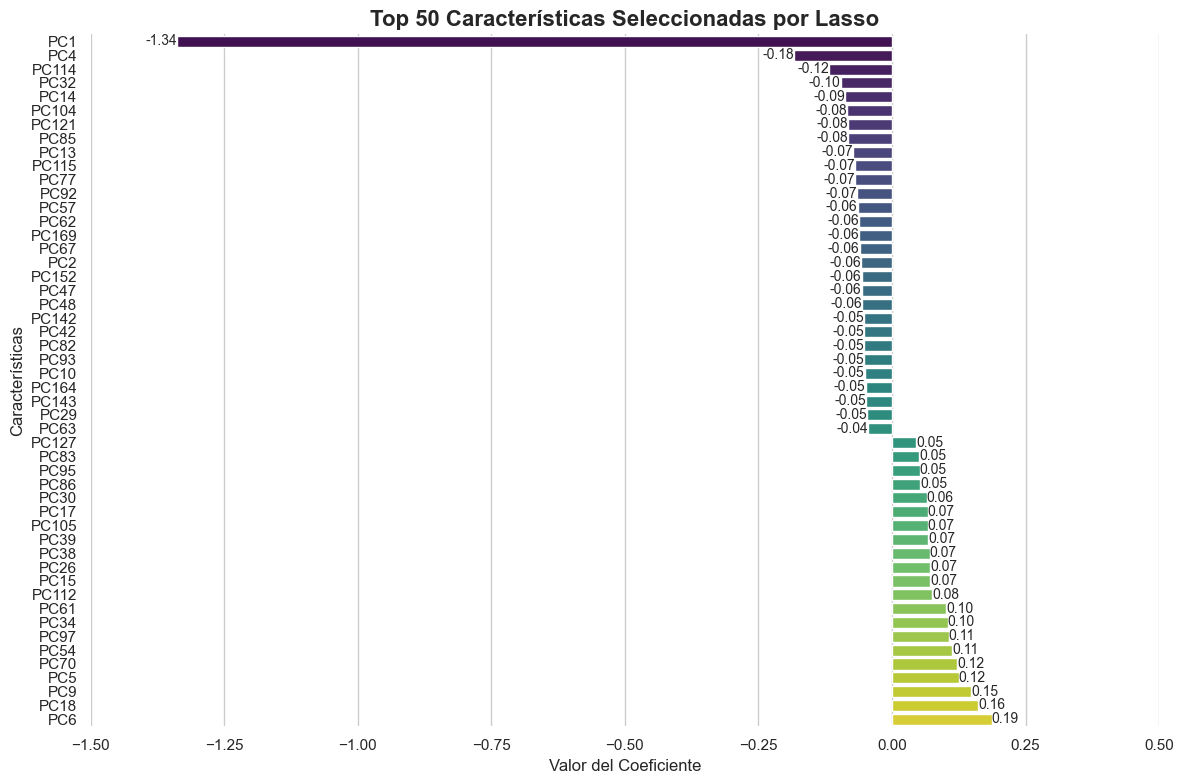

In [23]:
plot_top_lasso_features(selected_features, top_n=50, xlim=(-1.5, 0.5))

In [22]:
# Mostrar como tabla ordenada con columnas bien formateadas
selected_df = selected_features.sort_values(ascending=False).reset_index()
selected_df.columns = ["Componente PCA", "Coeficiente"]
print(selected_df.to_string(index=False))

Componente PCA  Coeficiente
           PC6     0.186608
          PC18     0.161858
           PC9     0.147886
           PC5     0.124760
          PC70     0.121827
          PC54     0.112524
          PC97     0.105919
          PC34     0.103937
          PC61     0.101653
         PC112     0.075228
          PC15     0.071605
          PC26     0.071214
          PC38     0.070726
          PC39     0.068096
         PC105     0.067143
          PC17     0.066776
          PC30     0.064712
          PC86     0.053086
          PC95     0.051616
          PC83     0.051002
         PC127     0.045349
         PC144     0.044204
         PC162     0.041480
          PC68     0.041055
         PC136     0.040975
         PC100     0.040556
           PC7     0.039434
          PC73     0.038976
          PC58     0.038345
         PC156     0.036815
          PC11     0.036689
         PC159     0.035996
          PC60     0.035916
         PC135     0.032466
         PC125     0

In [25]:
X_selected_lasso.shape

(40196, 151)

In [26]:
y_train.shape

(40196,)

Text(0.5, 1.0, 'Scatter Plot of Two Randomly Selected Features')

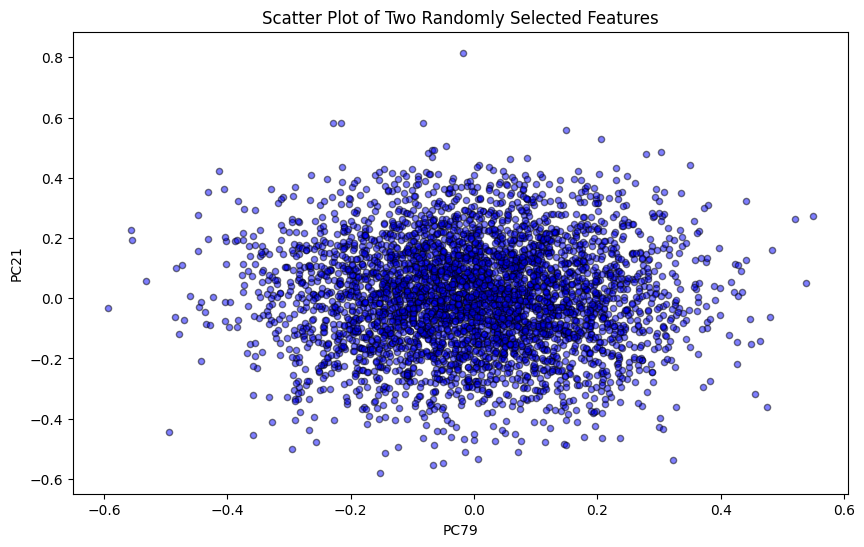

In [23]:
import random

random_cols = random.sample(list(X_selected_lasso.columns), 2)
X_selected_lasso[random_cols].sample(frac=0.1).plot(kind='scatter', figsize=(10, 6), alpha=0.5, x=random_cols[0], y=random_cols[1], color='blue', edgecolor='k')
plt.title('Scatter Plot of Two Randomly Selected Features')

Completely uncorrelated data 😬 ...

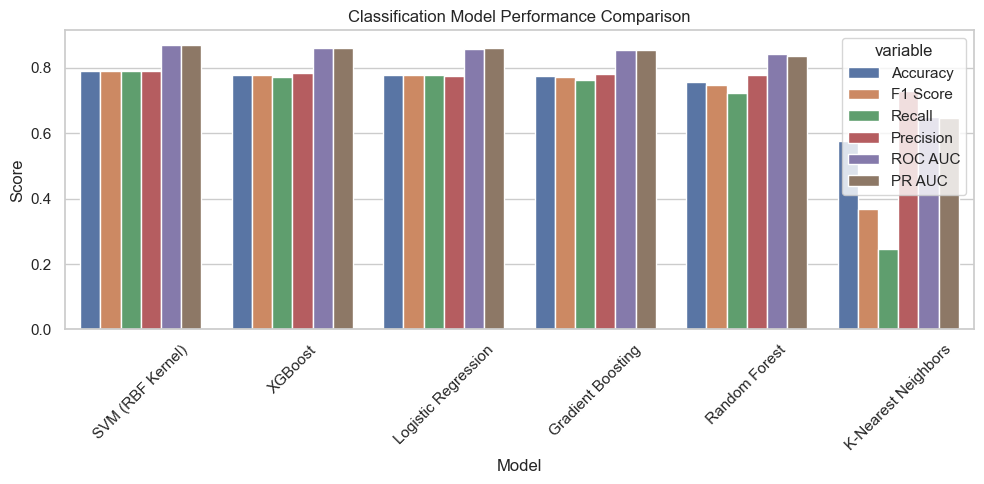

,Model,Accuracy,F1 Score,Recall,Precision,ROC AUC,PR AUC
3,SVM (RBF Kernel),0.791027,0.790663,0.789351,0.791979,0.870631,0.871183
5,XGBoost,0.779750,0.778260,0.773097,0.783493,0.859600,0.862254
0,Logistic Regression,0.777013,0.777308,0.778404,0.776216,0.858122,0.860339
4,Gradient Boosting,0.774359,0.771900,0.763642,0.780339,0.853854,0.854823
1,Random Forest,0.757857,0.748882,0.722176,0.777639,0.842545,0.835988
2,K-Nearest Neighbors,0.577245,0.368278,0.246475,0.728074,0.650261,0.648145


In [ ]:
df_3_balanced_lasso_no_nn = evaluate_models(X_selected_lasso, y_train, show_plot=True)

## Build a Neural Network Model using Tensorflow

In [57]:
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping

def train_neural_net(X_train, y_train, input_dim=None):
    """
    Entrena una red neuronal completamente conectada (feedforward) usando Keras con TensorFlow backend.

    Parámetros:
    ------------
    X_train : array-like (n_samples, n_features)
        Datos de entrenamiento escalados y listos para entrenar.

    y_train : array-like (n_samples,)
        Etiquetas de entrenamiento (0 o 1).

    input_dim : int, optional
        Número de variables de entrada (se detecta automáticamente si es None).

    Retorna:
    --------
    model : keras.Model
        Modelo entrenado listo para predicción.
    """

    # Detecta la dimensión de entrada automáticamente si no se proporciona
    if input_dim is None:
        input_dim = X_train.shape[1]

    # Definición del modelo
    model = models.Sequential([
    layers.Input(shape=(input_dim,)),         # Capa de entrada
    layers.Dense(256, activation='relu'),     # ✅ Nueva capa oculta 1 (256 neuronas)
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),     # Capa oculta 2
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),      # Capa oculta 3
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')     # Capa de salida
])


    # Compilación del modelo
    model.compile(
        optimizer='adam',                       # Optimizador Adam (robusto para la mayoría de casos)
        loss='binary_crossentropy',             # Pérdida binaria para clasificación 0-1
        metrics=['accuracy']                    # Métrica de rendimiento
    )

    # Entrenamiento con early stopping (detiene si no mejora)
    history = model.fit(
        X_train, y_train,
        epochs=500,
        batch_size=64,
        validation_split=0.2,
        callbacks=[EarlyStopping(patience=5, restore_best_weights=True)],
        verbose=0  # Cambia a 1 si quieres ver el progreso
    )

    return model, history


In [ ]:

# === Evaluation ===

def evaluate_models(X, y, show_plot=True):
    """
    Trains and evaluates all models on the same dataset.
    """
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, stratify=y, random_state=42
    )

    models = {
        'Logistic Regression': train_logistic(X_train, y_train),
        'Random Forest': train_rf(X_train, y_train),
        'KNN': train_knn(X_train, y_train),
        'SVM (RBF)': train_svc(X_train, y_train),
        'Gradient Boosting': train_gb(X_train, y_train),
        'XGBoost': train_xgboost(X_train, y_train, use_gpu=False),
        'Neural Net': train_neural_net(X_train, y_train)
    }

    results = []
    for name, model in models.items():
        if name == 'Neural Net':
            model = model[0]  # Extract the trained model from the tuple
            # hist = model[1]  # Extract the training history
            y_proba = model.predict(X_test).ravel()
            y_pred = (y_proba >= 0.5).astype(int)
        else:
            y_pred = model.predict(X_test)
            y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

        metrics = {
            'Model': name,
            'Accuracy': accuracy_score(y_test, y_pred),
            'F1 Score': f1_score(y_test, y_pred),
            'Recall': recall_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred),
            'ROC AUC': roc_auc_score(y_test, y_proba) if y_proba is not None else None,
            'PR AUC': average_precision_score(y_test, y_proba) if y_proba is not None else None
        }
        results.append(metrics)

    df_results = pd.DataFrame(results).sort_values(by='F1 Score', ascending=False)

    if show_plot:
        plt.figure(figsize=(12, 6))
        df_plot = df_results.melt(id_vars='Model', value_vars=['Accuracy', 'F1 Score', 'Recall', 'Precision', 'ROC AUC', 'PR AUC'])
        sns.barplot(data=df_plot, x='Model', y='value', hue='variable')
        plt.xticks(rotation=45)
        plt.title("Modelo de Clasificación - Comparación de Métricas")
        plt.tight_layout()
        plt.show()

    return df_results, models

377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


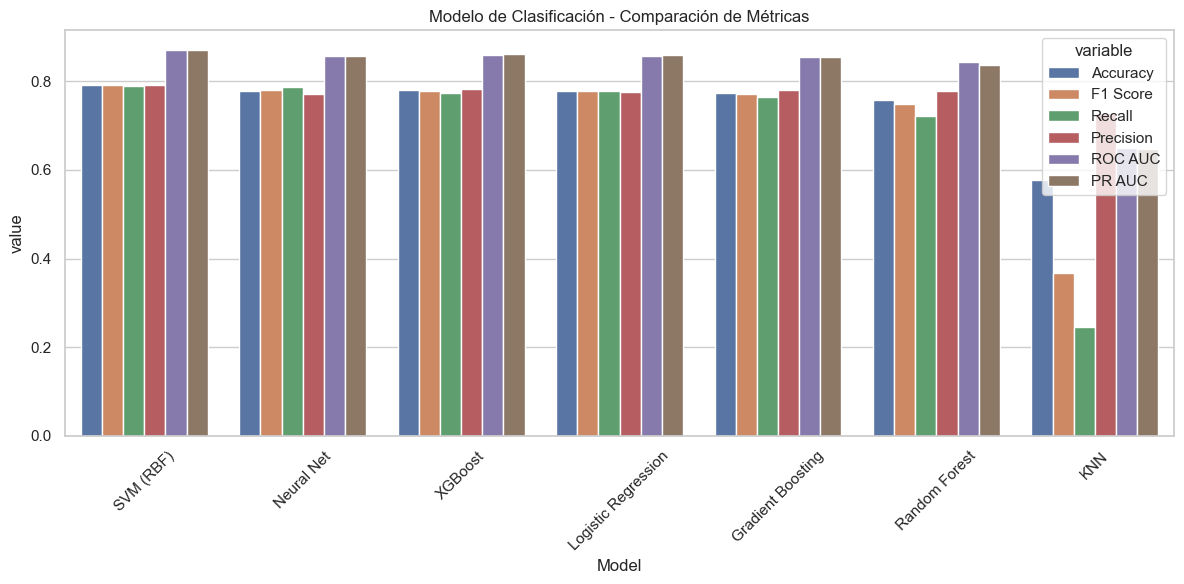

,Model,Accuracy,F1 Score,Recall,Precision,ROC AUC,PR AUC
3,SVM (RBF),0.791027,0.790663,0.789351,0.791979,0.870632,0.871186
6,Neural Net,0.777262,0.779438,0.787195,0.771833,0.856148,0.857430
5,XGBoost,0.779750,0.778260,0.773097,0.783493,0.859600,0.862254
0,Logistic Regression,0.777013,0.777308,0.778404,0.776216,0.858122,0.860339
4,Gradient Boosting,0.774359,0.771900,0.763642,0.780339,0.853854,0.854823
1,Random Forest,0.757857,0.748882,0.722176,0.777639,0.842545,0.835988
2,KNN,0.577245,0.368278,0.246475,0.728074,0.650261,0.648145


In [ ]:
#aplicando lasso despues del pca
df_4_balanced_lasso_nn, models_4_balanced_lasso_nn = evaluate_models(X_selected_lasso, y_train, show_plot=True)

377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


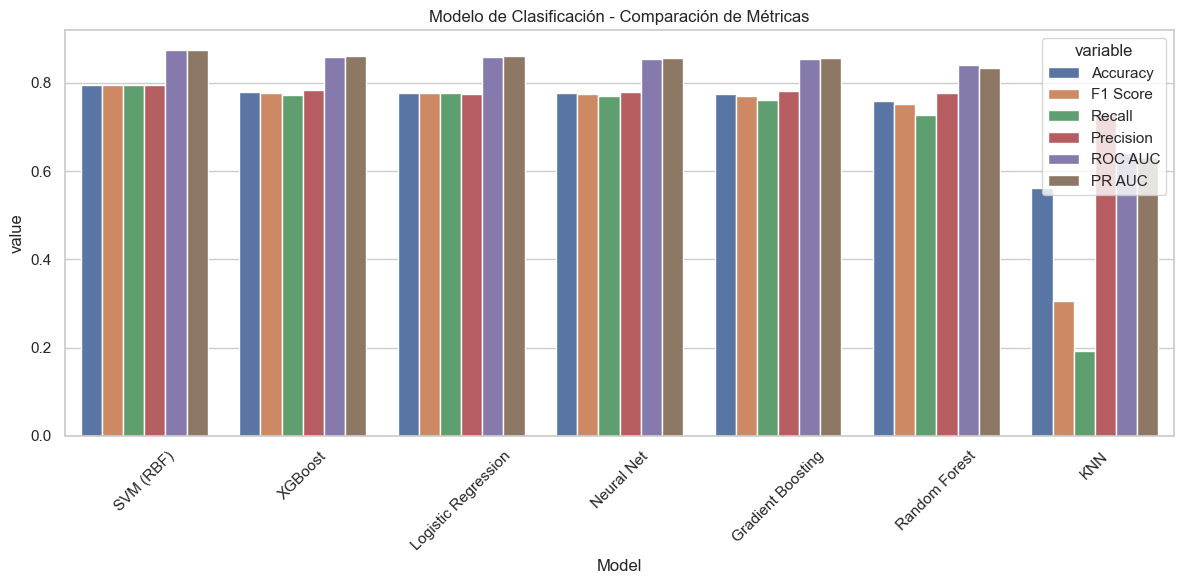

,Model,Accuracy,F1 Score,Recall,Precision,ROC AUC,PR AUC
3,SVM (RBF),0.795423,0.795185,0.794327,0.796044,0.874000,0.874990
5,XGBoost,0.779501,0.777880,0.772267,0.783575,0.859403,0.861558
0,Logistic Regression,0.776184,0.776369,0.777077,0.775662,0.857649,0.859856
6,Neural Net,0.775935,0.774457,0.769448,0.779533,0.854415,0.856746
4,Gradient Boosting,0.773613,0.770781,0.761320,0.780480,0.853395,0.855347
1,Random Forest,0.759350,0.751030,0.725991,0.777857,0.840162,0.832885
2,KNN,0.560660,0.305454,0.193233,0.728580,0.641480,0.633014


In [ ]:
# aplicado al pca
df_5_balanced_nn, models_5_balanced_nn = evaluate_models(X_pca, y_train, show_plot=True)

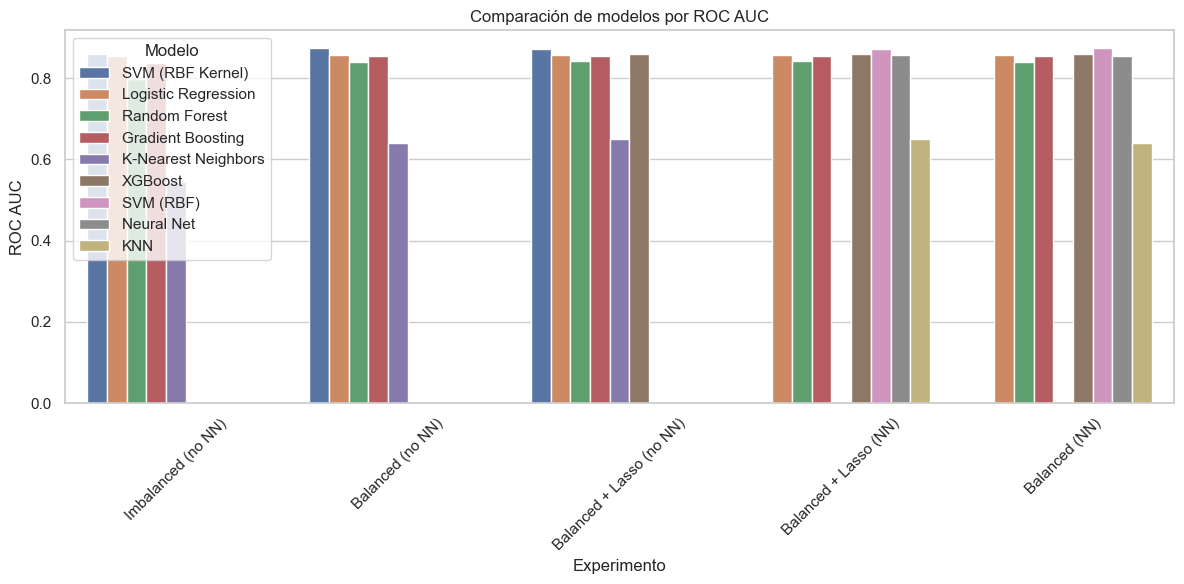

Model,Gradient Boosting,K-Nearest Neighbors,KNN,Logistic Regression,Neural Net,Random Forest,SVM (RBF Kernel),SVM (RBF),XGBoost
Experiment,,,,,,,,,
Balanced (NN),0.853395,NaN,0.641480,0.857649,0.854415,0.840162,NaN,0.874000,0.859403
Balanced (no NN),0.853395,0.641480,NaN,0.857649,NaN,0.840162,0.873999,NaN,NaN
Balanced + Lasso (NN),0.853854,NaN,0.650261,0.858122,0.856148,0.842545,NaN,0.870632,0.859600
Balanced + Lasso (no NN),0.853854,0.650261,NaN,0.858122,NaN,0.842545,0.870631,NaN,0.859600
Imbalanced (no NN),0.838112,0.544808,NaN,0.854505,NaN,0.797674,0.860032,NaN,NaN


KeyError: 'Experiment'

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dame el modelo con mejor ROC AUC
def mejor_modelo_roc_auc(df_list):
    """
    Encuentra el modelo con el mejor ROC AUC de una lista de DataFrames.
    
    Parámetros:
    df_list : list
        Lista de DataFrames que contienen los resultados de los modelos.
    
    Retorna:
    str
        Nombre del modelo con el mejor ROC AUC y el DataFrame en el que se encontró.
    """
    best_model = None
    best_roc_auc = 0
    best_df = None

    for df in df_list:
        if 'ROC AUC' in df.columns:
            max_roc_auc = df['ROC AUC'].max()
            if max_roc_auc > best_roc_auc:
                best_roc_auc = max_roc_auc
                best_model = df.loc[df['ROC AUC'] == max_roc_auc, 'Model'].values[0]
                best_df = df

    return best_model, best_df

def comparar_resultados(metric='F1 Score'):
    # Lista de dataframes y sus nombres
    dfs = [
        ('Imbalanced (no NN)', df_1_imbalanced_no_nn),
        ('Balanced (no NN)', df_2_balanced_no_nn),
        ('Balanced + Lasso (no NN)', df_3_balanced_lasso_no_nn),
        ('Balanced + Lasso (NN)', df_4_balanced_lasso_nn),
        ('Balanced (NN)', df_5_balanced_nn)
    ]
    
    # Unir todos los resultados en un solo dataframe
    all_results = []
    for name, df in dfs:
        if metric in df.columns:
            temp = df[['Model', metric]].copy()
            temp['Experiment'] = name
            all_results.append(temp)
    df_all = pd.concat(all_results, ignore_index=True)
    
    # Gráfico de columnas
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df_all, x='Experiment', y=metric, hue='Model')
    plt.title(f'Comparación de modelos por {metric}')
    plt.ylabel(metric)
    plt.xlabel('Experimento')
    plt.xticks(rotation=45)
    plt.legend(title='Modelo')
    plt.tight_layout()
    plt.show()
    
    # Tabla de datos
    tabla = df_all.pivot_table(index='Experiment', columns='Model', values=metric)
    display(tabla)

    # Obtener el mejor modelo y el dataframe en el que se encuentra
    best_model, best_df = mejor_modelo_roc_auc([df_1_imbalanced_no_nn, df_2_balanced_no_nn, df_3_balanced_lasso_no_nn, df_4_balanced_lasso_nn, df_5_balanced_nn])
    
    print(f"\nEl mejor modelo según {metric} es: {best_model} en el experimento {best_df['Experiment'].iloc[0]}")
    return best_model, best_df

# Ejemplo de uso:
comparar_resultados(metric='ROC AUC')


## Use best model to predict

In [16]:
# Balanced and normalizec data with pca applied
X_pca.shape, y_train.shape

((40196, 172), (40196,))

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Separate features and target for the balanced dataset with PCA
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y_train, test_size=0.3, stratify=y_train, random_state=42
)

# Building the SVM model with RBF kernel
model_name = 'SVM (RBF Kernel)'
model = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    probability=True,
    class_weight='balanced'
)

In [18]:
# Slice a fraction of the training data for visualization
frac = 0.1  # Fraction of data to sample for visualization

X_train_sample = X_train[:int(len(X_train) * frac)]
y_train_sample = y_train[:int(len(y_train) * frac)]

# Train the model
model.fit(X_train_sample, y_train_sample)

SVC(class_weight='balanced', probability=True)

In [37]:
X_train_sample.shape, y_train_sample.shape

((2813, 172), (2813,))

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score, precision_score, average_precision_score

# Evaluate model
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

metrics = {
    'Model': model_name,
    'Accuracy': accuracy_score(y_test, y_pred),
    'F1 Score': f1_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'ROC AUC': roc_auc_score(y_test, y_proba) if y_proba is not None else None,
    'PR AUC': average_precision_score(y_test, y_proba) if y_proba is not None else None
}

df_results = pd.DataFrame([metrics]).sort_values(by='F1 Score', ascending=False)
df_results

,Model,Accuracy,F1 Score,Recall,Precision,ROC AUC,PR AUC
0,SVM (RBF Kernel),0.77892,0.778571,0.777409,0.779737,0.857287,0.856515


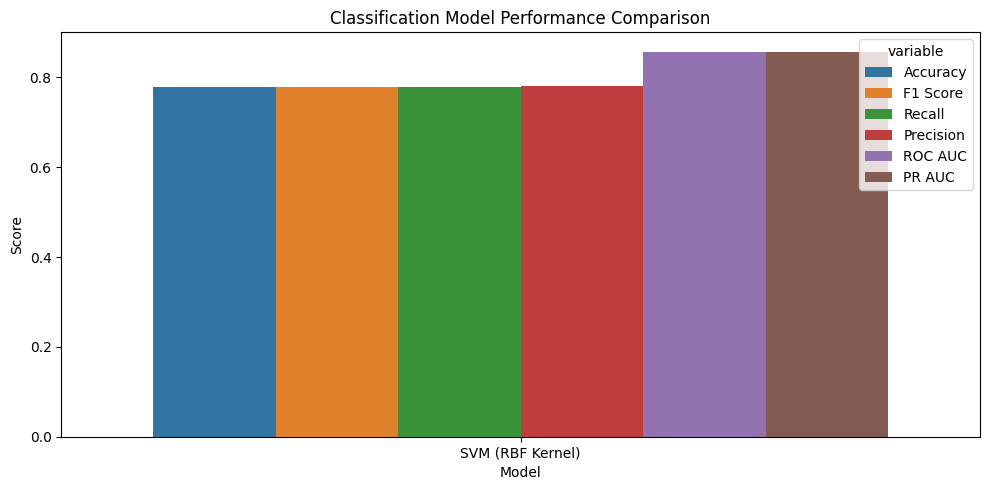

In [24]:
import seaborn as sns

# Visualization
plt.figure(figsize=(10, 5))
df_plot = df_results.melt(id_vars='Model', value_vars=[ 'Accuracy', 'F1 Score', 'Recall', 'Precision', 'ROC AUC', 'PR AUC'])
sns.barplot(data=df_plot, x='Model', y='value', hue='variable')
plt.title("Classification Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

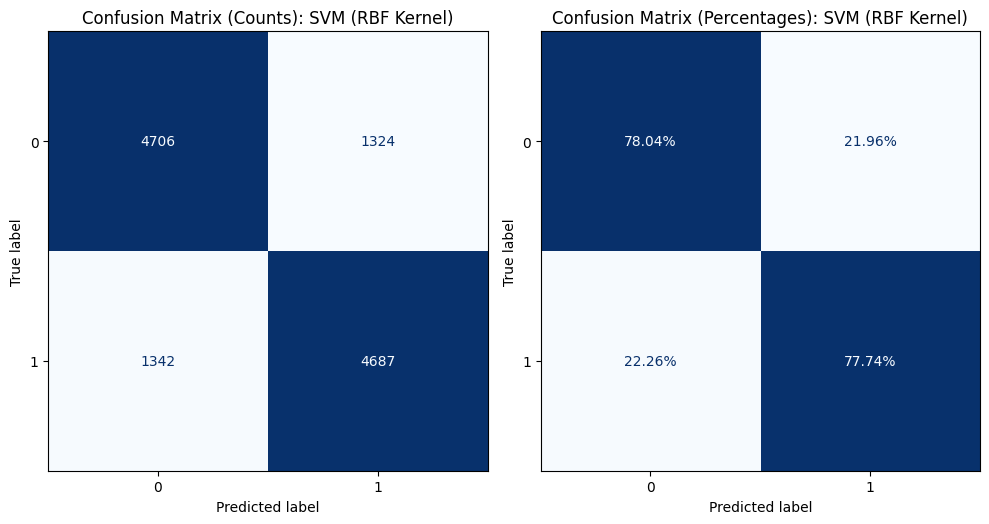

In [31]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, axes = plt.subplots(1, 2, figsize=(10, 10))

# Plot 1: Counts
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=axes[0], cmap='Blues', colorbar=False)
axes[0].set_title(f'Confusion Matrix (Counts): {model_name}')

# Plot 2: Percentages
cm_percent = cm.astype('float') / cm.sum(axis=1, keepdims=True)
disp_percent = ConfusionMatrixDisplay(confusion_matrix=cm_percent)
disp_percent.plot(ax=axes[1], cmap='Blues', colorbar=False, values_format='.2%')
axes[1].set_title(f'Confusion Matrix (Percentages): {model_name}')

plt.tight_layout()
plt.show()


In [ ]:
## Build the test set with predictions
df_predictions = pd.DataFrame(X_train, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
df_predictions['target'] = y_train.values
df_predictions['y_pred'] = model.predict(X_train)
df_predictions['y_proba'] = model.predict_proba(X_train)[:, 1] if hasattr(model, 'predict_proba') else None
df_predictions

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC166,PC167,PC168,PC169,PC170,PC171,PC172,y_pred,y_proba,target
0,-0.064404,0.303766,-0.047787,0.337375,0.204250,0.398403,-0.162986,-0.132267,0.010662,0.082631,...,0.103848,0.197091,0.253741,-0.202272,-0.078828,-0.069130,0.109793,1,0.851732,1
1,0.019692,0.202085,-0.073318,0.433063,-0.063633,0.032902,-0.148261,-0.011663,0.159961,-0.175314,...,0.022135,0.124153,0.028680,0.042389,0.094213,-0.060441,-0.268548,0,0.082149,0
2,0.247792,-0.211691,-0.203609,0.391972,0.023940,-0.136347,0.050245,0.213392,-0.006891,0.029752,...,0.018734,-0.264837,-0.022572,0.085551,0.044347,-0.083006,0.114565,0,0.016229,0
3,0.053636,-0.059294,0.100255,0.025047,0.015523,-0.091816,-0.403625,0.104869,0.048675,-0.352465,...,-0.210843,-0.103124,0.079577,-0.021130,-0.034314,-0.066371,-0.215293,0,0.143171,0
4,-0.102747,0.118853,-0.187469,0.081978,0.114081,-0.014030,0.058811,0.152562,0.106828,0.281257,...,0.265312,0.070981,-0.160628,-0.145455,-0.038872,-0.118767,-0.053810,1,0.923144,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28132,-0.126553,-0.292129,0.317339,-0.080946,-0.147715,-0.082871,0.237492,0.127680,0.147336,-0.199063,...,-0.085080,-0.084445,0.020856,-0.115162,-0.158256,-0.026577,0.151322,1,0.558806,1
28133,0.373690,-0.043636,-0.200478,-0.110345,0.222638,-0.019646,0.025794,-0.082024,0.196001,-0.478632,...,-0.151082,-0.043205,-0.150114,0.116732,0.224735,-0.189773,0.206453,0,0.051033,0
28134,-0.063745,0.118868,-0.128808,-0.106634,-0.231494,0.389193,-0.105513,0.016524,-0.291034,0.120052,...,-0.158859,0.001827,0.080302,0.200287,-0.083041,0.105354,-0.091319,1,0.713384,0
28135,-0.103731,0.282431,-0.166594,0.365837,-0.038566,-0.051121,-0.115295,-0.286590,0.181049,0.050105,...,0.106657,0.133523,-0.173018,-0.151984,0.209867,0.011263,-0.146889,1,0.728618,1


In [ ]:
df_sample.head()

,ID_code,target
0,test_0,0
1,test_1,0
2,test_2,0
3,test_3,0
4,test_4,0
...,...,...
199995,test_199995,0
199996,test_199996,0
199997,test_199997,0
199998,test_199998,0


In [53]:
# Normalize the test set
X_test_scaled = scaler.transform(df_test.drop(columns=['ID_code']))
# Apply PCA to the test set
X_test_pca = pca_model.transform(X_test_scaled)

c:\Users\ricardo.jaramillo\Documents\Python\Customer-Transaction-Prediction\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [54]:
## Build df_sample submission file
df_sample['target'] = model.predict(X_test_pca)
df_sample

,ID_code,target
0,test_0,0
1,test_1,1
2,test_2,1
3,test_3,1
4,test_4,0
...,...,...
199995,test_199995,0
199996,test_199996,0
199997,test_199997,0
199998,test_199998,0


In [57]:
df_sample.target.value_counts()

target
0    146339
1     53661
Name: count, dtype: int64

In [56]:
df_sample.to_csv('data/submission.csv', index=False)